# Problem Statement

The dataset provides credit card usage information for the last 6 months. The main objective is to analyze credit card usage patterns and understand customer shopping behavior.


# Objective

* Determine the average balance that customers maintain and identify groups of customers that maintain high balances.
* To identify customers who frequently make purchases using their credit cards and the amount shot for those purchases.
* To analyze credit limits granted to customers and identify customers who exceed their credit limits.

# ii. Import Library

In [5]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from phik import phik_matrix

#model
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.datasets import make_blobs


#evaluasi
from imblearn.pipeline import Pipeline as ImbPipeline

#save model
import pickle


import warnings
warnings.filterwarnings(action='ignore')

# iii. Data Loading

* BigQuery

- SELECT * 
- FROM `ftds-hacktiv8-project.phase1_ftds_004_hck.credit-card-information` 
- WHERE MOD(CUST_ID, 2) = 0

In [6]:
#loading data and handle missingvalue non-standard
missing_values = ["n/a", "na", "--",' ?','-', '?','? ','none']
df = pd.read_csv('h8dsft_P1G4_hanifah.csv',na_values = missing_values)
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875000,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125000,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8
5,4266,2237.238086,1.000000,120.0,120.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2500.0,343.102984,712.986387,0.0,8
6,4360,2730.843802,1.000000,2900.0,2900.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2900.0,0.000000,NaN,0.0,8
7,4680,424.994385,0.375000,1200.0,1200.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1200.0,57.266292,56.720210,0.0,8
8,5884,18.885677,0.375000,57.0,57.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
9,24,0.004816,0.545455,51.7,0.0,51.7,0.0,0.250,0.000,0.250,0.0,0,3,3000.0,33.249088,0.059481,0.0,12


The following is data for the last 6 months of credit cards featuring the top 10 data. handling non-standard missing values like ["n/a", "na", "--",'?'] is changed to nan value and displays the top 10 data. the information in the data is:


* BALANCE: Total credit card balance owned by the customer.
* BALANCE_FREQUENCY: The frequency with which a customer makes payments or uses a credit card within a certain period of time.
* PURCHASES: The total number of purchases made by a customer with a credit card.
* ONEOFF_PURCHASES: The total number of purchases made by a customer in one credit card transaction.
* INSTALLMENTS_PURCHASES: Total purchase amount paid in installments by customers with credit cards.
* CASH_ADVANCE: Total amount of money withdrawn by customers using credit cards as cash.
* PURCHASES_FREQUENCY: The number of times a customer makes purchases with a credit card within a certain period of time.
* ONEOFF_PURCHASES_FREQUENCY: The frequency of purchases made by a customer in one credit card transaction within a certain period.
* PURCHASES_INSTALLMENTS_FREQUENCY: The frequency of purchases made by the customer pays in installments by credit card for a specified period of time.
* CASH_ADVANCE_FREQUENCY: The frequency of cash withdrawals by customers with credit cards within a certain period of time.
* CASH_ADVANCE_TRX: Number of cash withdrawal transactions by customers with credit cards.
* PURCHASES_TRX: Number of purchase transactions made by customers with credit cards.
* CREDIT_LIMIT: The credit limit given by credit card issuers to customers.
* PAYMENTS: The total amount of payments made by customers on credit cards.
* MINIMUM_PAYMENTS: The minimum number of payments a customer must make each month on a credit card.
* PRC_FULL_PAYMENT: Percentage of the amount of full payment made by the customer to the total credit card bill within a certain period.
* TENURE: The period of time (in months) during which the customer has used the credit card.

In [7]:
#displays the bottom 10 data
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,1588,538.768762,0.909091,226.95,129.58,97.37,452.009130,0.545455,0.090909,0.454545,0.272727,8,9,1200.0,946.649324,211.220001,0.000000,11
4466,6900,7468.012010,1.000000,1569.41,796.07,773.34,4500.288676,0.545455,0.454545,0.363636,0.272727,7,10,8700.0,2162.943350,4628.802111,0.000000,11
4467,2528,427.642111,0.888889,0.00,0.00,0.00,2563.705644,0.000000,0.000000,0.000000,0.888889,62,0,1200.0,2853.967334,146.976542,0.500000,9
4468,1226,706.327578,0.888889,169.54,169.54,0.00,1406.735573,0.333333,0.333333,0.000000,0.888889,14,3,2500.0,302.976780,142.597254,0.000000,9
4469,2152,1420.727073,1.000000,0.00,0.00,0.00,311.804499,0.000000,0.000000,0.000000,0.900000,9,0,1500.0,506.765033,449.179818,0.000000,10
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11
4474,3564,1977.007090,1.000000,1032.04,226.90,805.14,4335.919227,0.909091,0.090909,0.818182,0.545455,21,17,4000.0,3056.424974,910.707525,0.090909,11



The data above displays the bottom 10 data from the dataset.

# iv. Exploratory Data Analysis Before

In [8]:
# Check missing values for each column in the DataFrame
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

MAR MNAR 

In [9]:
#check duplicate 
df.duplicated().sum()

0

In [10]:
#check uniq values ​​for nonstandard missing values
for i in df:
    print(i, ':' , df[i].unique(), '\n')

CUST_ID : [ 788 1902 2322 ... 4296 4476 3564] 

BALANCE : [1.65815350e+01 9.43584041e+02 1.97991600e+00 ... 3.38649088e+03
 4.84054557e+03 1.97700709e+03] 

BALANCE_FREQUENCY : [0.125    0.875    1.       0.375    0.545455 0.454545 0.363636 0.181818
 0.909091 0.       0.272727 0.090909 0.727273 0.818182 0.25     0.636364
 0.75     0.625    0.6      0.5      0.833333 0.444444 0.666667 0.8
 0.571429 0.857143 0.777778 0.7      0.333333 0.888889 0.166667 0.714286
 0.2      0.3      0.1      0.9      0.4      0.111111 0.222222 0.285714
 0.142857 0.555556] 

PURCHASES : [ 200.    103.     80.   ...  560.98 1595.93 1032.04] 

ONEOFF_PURCHASES : [   0.    103.     80.   ...  427.22 1595.93  226.9 ] 

INSTALLMENTS_PURCHASES : [200.     0.    51.7  ... 773.34 133.76 805.14] 

CASH_ADVANCE : [   0.       1103.30382   455.227731 ... 2008.153534 4359.32575
 4335.919227] 

PURCHASES_FREQUENCY : [0.125    0.25     0.375    0.5      0.625    0.75     0.875    1.
 0.090909 0.181818 0.363636 0.142857 0.

In [11]:
# Summery Statistics
df.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                                    .background_gradient(subset=['std'], cmap='Reds')\
                                    .background_gradient(subset=['75%'], cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
CUST_ID,4475.000000,4476.000000,2583.931114,2.000000,2239.000000,4476.000000,6713.000000,8950.000000
BALANCE,4475.000000,1565.743939,2091.205727,0.000000,132.536353,874.905296,2058.519163,19043.138560
BALANCE_FREQUENCY,4475.000000,0.877608,0.235604,0.000000,0.888889,1.000000,1.000000,1.000000
PURCHASES,4475.000000,1003.158324,2210.812899,0.000000,40.065000,362.480000,1122.640000,49039.570000
ONEOFF_PURCHASES,4475.000000,588.504849,1666.500287,0.000000,0.000000,29.990000,580.320000,40761.250000
INSTALLMENTS_PURCHASES,4475.000000,415.025075,927.360842,0.000000,0.000000,89.450000,484.255000,22500.000000
CASH_ADVANCE,4475.000000,973.453671,2133.464502,0.000000,0.000000,0.000000,1098.569962,29282.109150
PURCHASES_FREQUENCY,4475.000000,0.490122,0.399874,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,4475.000000,0.202614,0.298502,0.000000,0.000000,0.083333,0.333333,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,4475.000000,0.364989,0.397336,0.000000,0.000000,0.166667,0.750000,1.000000


The following is a statistical summary of the data. From the data above we can see the sum, average, std, min, quartile and max of each column. The entire code aims to display summary statistics from the df (dataframe) by adding bar and background gradient visualizations to several data subsets.

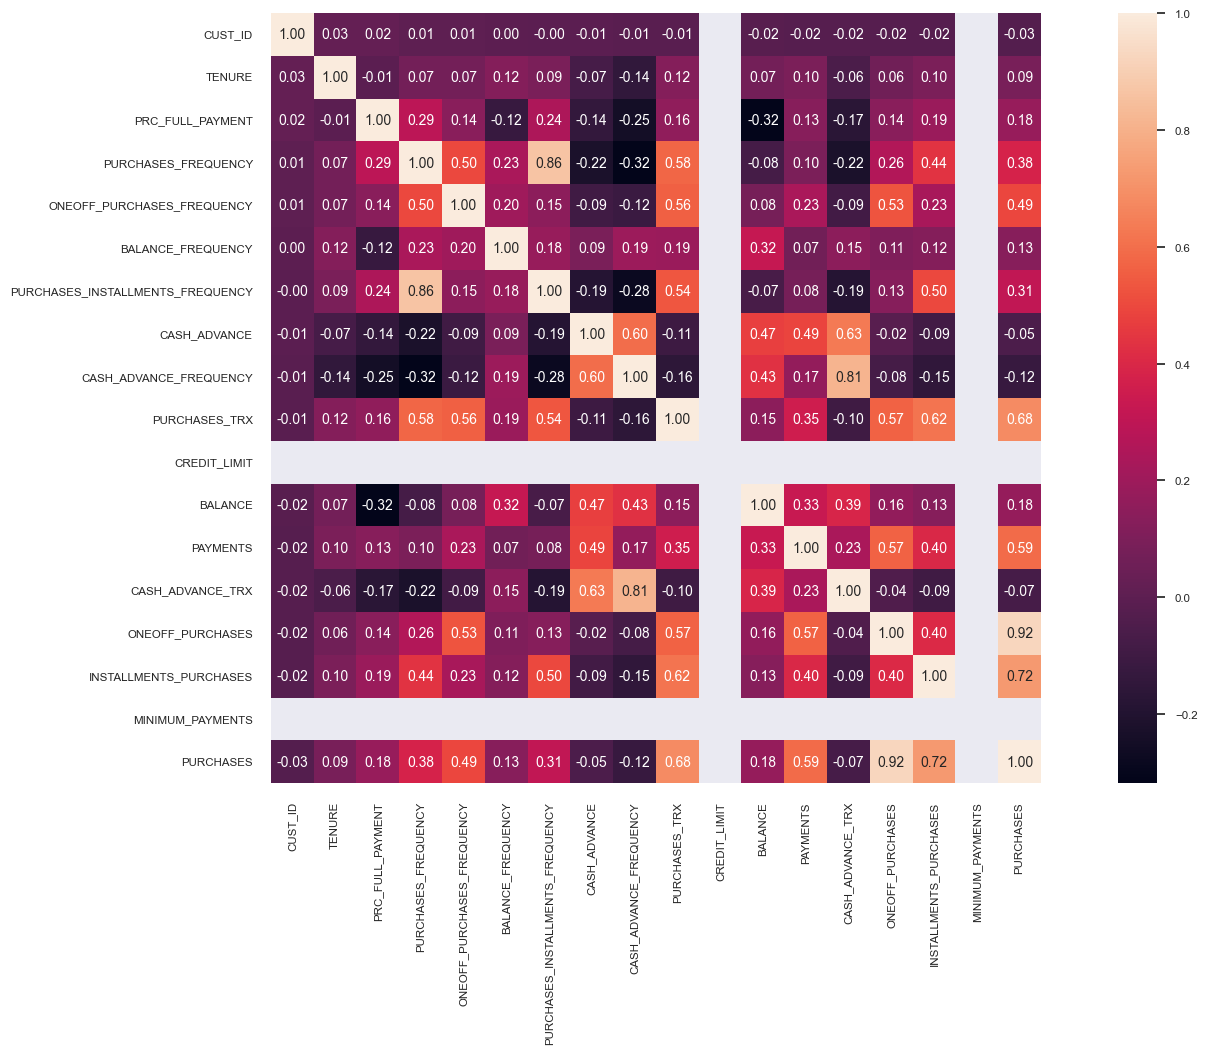

In [12]:
#Check numerical correlation
k = 30 # number of variables from heatmap
plt.figure(figsize=(20,10))
cols = df.corr().nlargest(k, 'CUST_ID')['CUST_ID'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=0.75)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [13]:
#phik correlation for numerical and categorical
df.phik_matrix().nlargest(17,'CUST_ID')['CUST_ID']


interval columns not set, guessing: ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


CUST_ID                             1.000000
CASH_ADVANCE                        0.066902
CASH_ADVANCE_FREQUENCY              0.053983
TENURE                              0.045513
BALANCE                             0.039831
PURCHASES_INSTALLMENTS_FREQUENCY    0.038108
PURCHASES                           0.022700
CREDIT_LIMIT                        0.019327
PURCHASES_TRX                       0.017613
ONEOFF_PURCHASES_FREQUENCY          0.015620
BALANCE_FREQUENCY                   0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
PURCHASES_FREQUENCY                 0.000000
CASH_ADVANCE_TRX                    0.000000
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    0.000000
Name: CUST_ID, dtype: float64

From the data above, the correlation results between columns are obtained with accuracy values that can be used as a reference for feature selection. From the number of columns in the feature selection, the columns 'CASH_ADVANCE', 'BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PURCHASES_TRX' are selected. ', supported by a high correlation and the columns are interconnected, it is hoped that the predictors that will be tested on the model have good performance.

# v. Feature Engineering & Preprocessing

In [14]:
# select feature selection
num = ['CASH_ADVANCE','BALANCE','PURCHASES','CREDIT_LIMIT','PURCHASES_TRX']

dfc = df[num]

The following are the columns that will be used as features in modeling.

* CASH_ADVANCE: The amount of cash a customer withdraws from their credit card account.
* BALANCE: The amount of money remaining in the customer's account at a given moment.
* PURCHASE: The total number of purchases a customer made.
* CREDIT_LIMIT: The credit limit given to customers.
* PURCHASES_TRX: The number of purchase transactions made by the customer.

In [15]:
# Calculate the percentage of missing values
dfc.isnull().sum() / dfc.shape[0] * 100

CASH_ADVANCE     0.000000
BALANCE          0.000000
PURCHASES        0.000000
CREDIT_LIMIT     0.022346
PURCHASES_TRX    0.000000
dtype: float64

Missing At Random (MAR) refers to a situation where missing data may be related to the variable being measured, but not related to the missing value itself. In this case, if the missing values are not taken into account in the analysis, the results obtained can be considered accurate and representative. the data above shows that the data in the CREDIT_LIMIT column has a 0.02% outlier, therefore because the outliers are also not significantly large a drop will be made.

In [16]:
# drop rows with MV
dfc.dropna(inplace=True)

drop column missing value.

In [17]:
#cek missing value
dfc.isnull().sum()

CASH_ADVANCE     0
BALANCE          0
PURCHASES        0
CREDIT_LIMIT     0
PURCHASES_TRX    0
dtype: int64

Missing value successfully dropped.

In [18]:
X = dfc.copy()

In [19]:
df1 = X.copy()

In [20]:
clus_sample = dfc.index.tolist()

In [21]:
#chek shape dfc
dfc.shape

(4474, 5)

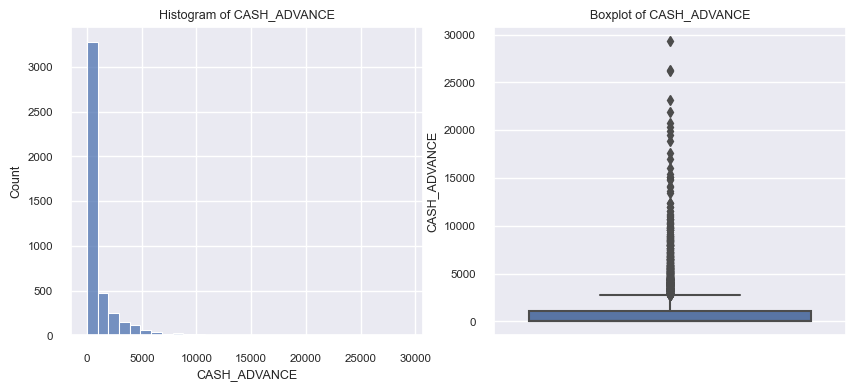


Skewness Value :  4.739677538274201


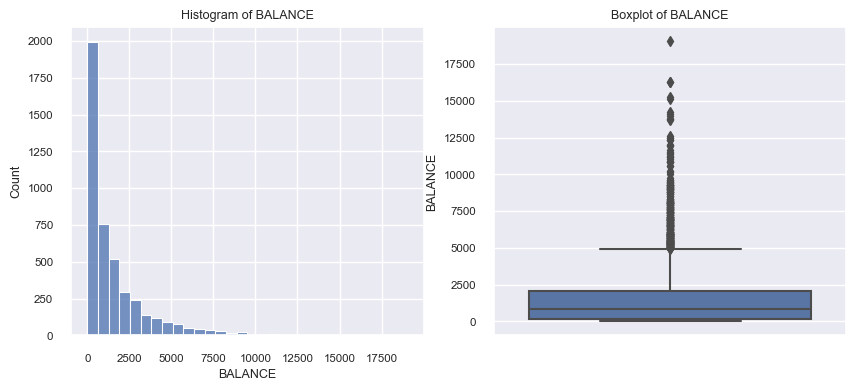


Skewness Value :  2.456620962191608


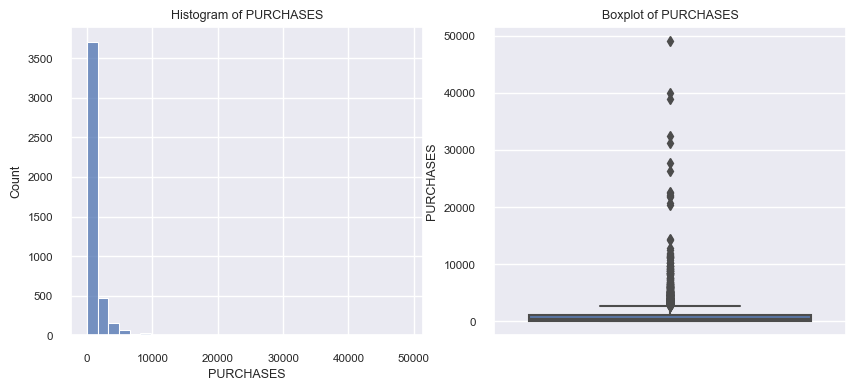


Skewness Value :  8.987051591977552


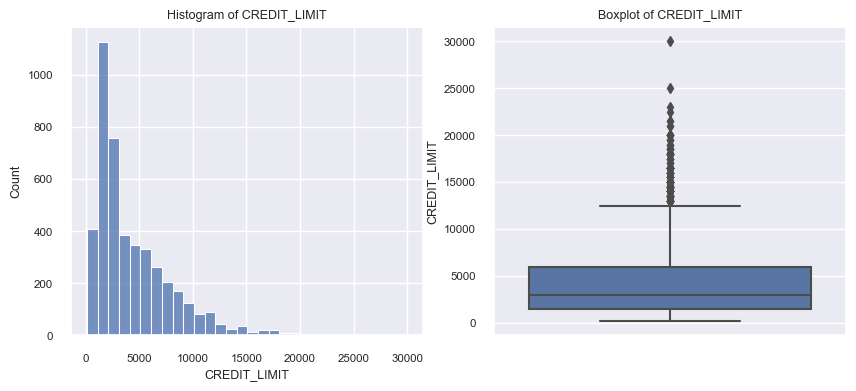


Skewness Value :  1.5450779677462632


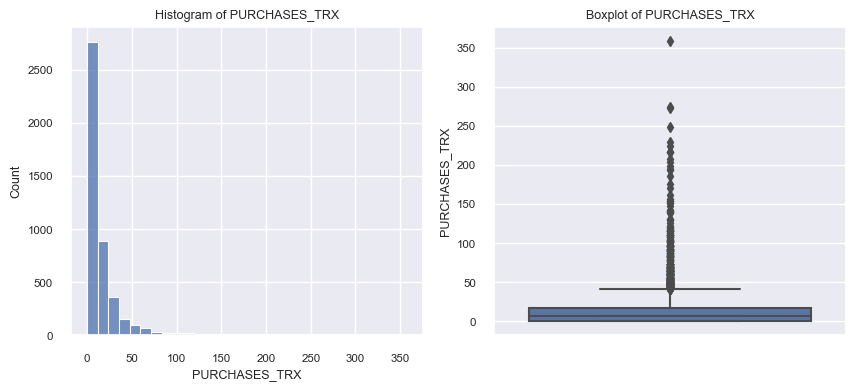


Skewness Value :  4.480452469147952


In [22]:
#View distribution & outliers in numeric columns
num_col_unclear = df[num]

# looping num_col_unclear
for col in num_col_unclear:
    # Define figure size
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30)
    plt.title('Histogram of {}'.format(col))
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title('Boxplot of {}'.format(col))
    

    plt.show()
    # diagnostic_plots(num_col)
    print('\nSkewness Value : ', df[col].skew())

In [23]:
# check skewness
for i in dfc.columns:
    print(i, ': ', dfc[i].skew())

CASH_ADVANCE :  4.739128231310472
BALANCE :  2.456391946636637
PURCHASES :  8.98638506210072
CREDIT_LIMIT :  1.545077967746263
PURCHASES_TRX :  4.480138709343122


From the data above it shows that the 5 columns have an abnormal distribution, in this case it can be seen that the skew value is also relatively high, so the outlier handling will be carried out with the winsorizer method where Winsorizer is a technique for limiting extreme values in the dataset. Winsorizer can help reduce the effect of outliers in data analysis. In Winsorizing, values that are smaller or larger than the specified limit will be replaced with the value of the limit.

In [24]:
# check outlier
wins_iqr = Winsorizer(capping_method='iqr', fold=2, tail='both')
dfc = wins_iqr.fit_transform(dfc)

Winsorizer objects are created with the parameter capping_method='iqr', which means the interquartile range (IQR) method will be used to identify outliers. In addition, the parameter fold=2 indicates that values outside 2 times the IQR range will be considered as outliers, and tail='both' indicates that outliers will be identified on both sides (top and bottom).

Then, the fit_transform() method of the Winsorizer object is called with the dfc argument. This method will calculate the IQR value and adjust the values that are outside the IQR range to be the minimum or maximum value in that range. As a result, data that has been removed by outliers will be stored back in the dfc variable.


In [25]:
# scaling
scaler = MinMaxScaler()
dfc = pd.DataFrame(scaler.fit_transform(dfc))
dfc.head()

,0,1,2,3,4
0,0.0,0.002803,0.060821,0.070707,0.040816
1,0.0,0.159492,0.031323,0.057239,0.020408
2,0.0,0.000335,0.024328,0.090909,0.020408
3,0.0,0.077999,0.177900,0.057239,0.020408
4,0.0,0.178087,0.440949,0.090909,0.020408


from the skew that has been searched for is abnormal data distribution, in scaling abnormal data distribution the columns of the dfc dataframe will be normalized using MinMaxScaler.

In [26]:
# Calculating VIF (Multicollinearity)
def calc_vif(dfc):
    vif = pd.DataFrame()
    vif["variables"] = dfc.columns
    vif["VIF"] = [variance_inflation_factor(dfc.values, i) for i in range(dfc.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=False)
    return(vif)

In [27]:
dfc = dfc.iloc[:,:16]
calc_vif(dfc)

,variables,VIF
2,2,4.865683
4,4,4.540293
3,3,3.357332
1,1,3.127882
0,0,2.112354


VIF is used to evaluate whether there are multicollinearity problems in the data. Multicollinearity problems occur when two or more independent variables in the model have a high correlation with each other, thus making the analysis results inaccurate and unreliable. from the data above the average column has a VIF value that is relatively the same as the number of values is quite small, this will be done by PCA for further processing.

In [28]:
# Create PCA object and calculate PCA on dfc dataframe
pca = PCA()
pca.fit(dfc)

np.cumsum(pca.explained_variance_ratio_) # Calculate the cumulative sum of the explained variance ratio values


array([0.40966866, 0.79555185, 0.89434167, 0.95998798, 1.        ])

principal components (PCA) on data stored in a DataFrame called dfc, then calculates the cumulative sum of the variance ratios explained by these principal components.

In [29]:
# take only the principal components that can explain 90% of the variance of the data
pca = PCA(n_components=.90)
dfc = pd.DataFrame(pca.fit_transform(dfc))
dfc

,0,1,2,3
0,-0.180668,-0.438431,-0.002329,-0.014629
1,-0.224341,-0.358574,0.078740,-0.120170
2,-0.213961,-0.442670,0.018891,0.003598
3,-0.124700,-0.377439,0.011799,-0.060548
4,0.044186,-0.249933,0.029228,-0.082697
...,...,...,...,...
4469,-0.405796,-0.101435,-0.133639,-0.059267
4470,-0.613498,0.349213,-0.447497,0.217383
4471,-0.056918,0.611452,0.070490,0.105255
4472,0.001498,0.985565,-0.280549,-0.187928


Apply PCA to the dfc dataframe and take only the principal components that can explain 90% of the data variance using the fit_transform() method. The results of the PCA transformation are then stored in a new dataframe with the name dfc.

<AxesSubplot: xlabel='0', ylabel='1'>

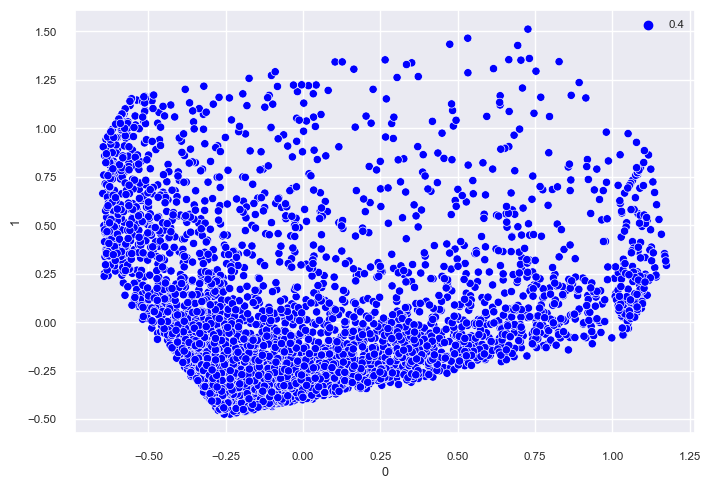

In [30]:
pca_viz = PCA(n_components=2)
X_viz = pd.DataFrame(pca_viz.fit_transform(dfc))
sns.scatterplot(x=X_viz[0], y=X_viz[1], hue=0.4, palette=[ 'blue'])



The output shows a scatter plot resulting from dimension reduction using PCA with 2 components. The plot shows the relationship between each data point on the new two dimensions generated by PCA. The color in the plot indicates the value of the fourth feature in the dataset (assumed to be a label or category). So that the plot can help us see patterns or clusters that might be formed from the data.

# Preprocess

In [31]:
# pipelines
pipe = Pipeline([
    ('wins', Winsorizer(capping_method='iqr', fold=3, tail='both')),
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=.90))
])

In [32]:
#data training
X_tr = pipe.fit_transform(X)
X_tr

array([[-0.17701639, -0.33797349, -0.01125226],
       [-0.20317426, -0.27827668,  0.06197443],
       [-0.20267671, -0.33982931,  0.00269767],
       ...,
       [-0.01282949,  0.43662912,  0.08056995],
       [-0.0152144 ,  0.90165214, -0.28411307],
       [-0.19773131,  0.61791512, -0.4900205 ]])

# Modeling

In [33]:
#modeling
k_range = range(2, 11) #k values ​​are tested from 2 to 10
inertias = []
for k in k_range: # Perform iteration for each k value
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_tr)

### Technique 1 elbow point

Text(0, 0.5, 'Inertia')

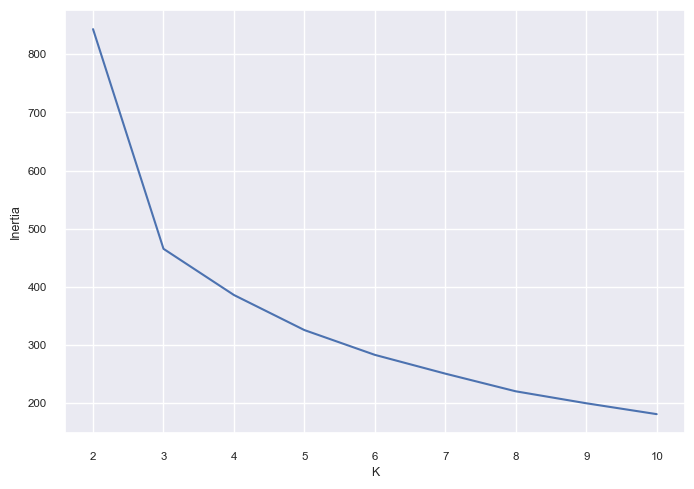

In [34]:
# elbow with visualization
K=[2,3,4,5,6,7,8,9,10]
inertia=[KMeans(n_clusters=i).fit(X_tr).inertia_ for i in K]
plt.plot(K,inertia,'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')

This plot is used to find the optimal number of clusters for K-Means clustering. The optimal number of clusters can be selected at the point where the decrease in Inertia begins to decrease significantly (elbow point). from the data above it can be seen that the fault is at K=3.

### Technique 2 silhouette_score

In [35]:
#model with silhouette
k_range = range(2, 11)
silhouette = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_tr)
    silhouette_avg = silhouette_score(X_tr, cluster_labels)
    silhouette.append(silhouette_avg)

find the best K value on the K-Means clustering algorithm using the Silhouette Score method. Silhouette Score is a method used to measure how well a data is grouped into a particular cluster. The higher the Silhouette Score, the better the clustering will be.

In [36]:
#score silhouette
silhouette_avg

0.35672688516210377

The result of Silhouette Score is 0.35672688516210377

In [37]:
cluster_labels

array([0, 0, 0, ..., 3, 7, 5])

In [38]:
# Perform K-Means clustering with optimal number of clusters
k = np.argmax(silhouette) + 2
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_tr)


In [39]:
#check the best k value
k

3

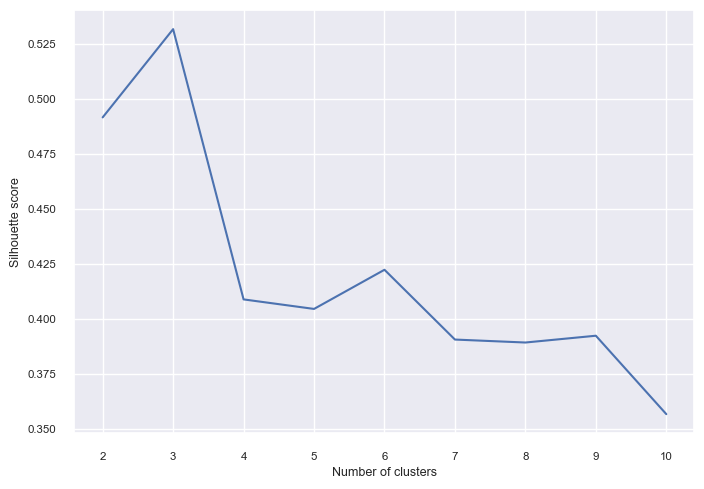

In [40]:
# Plotting silhouette score
plt.plot(k_range, silhouette)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

From the picture above I visualize the results of the Silhouette Score by using a plot line to determine the best K value that gives the highest Silhouette Score. In this case, the best K value chosen is the K value with the highest average Silhouette Score being 0.35672688516210377. The best K value is 3

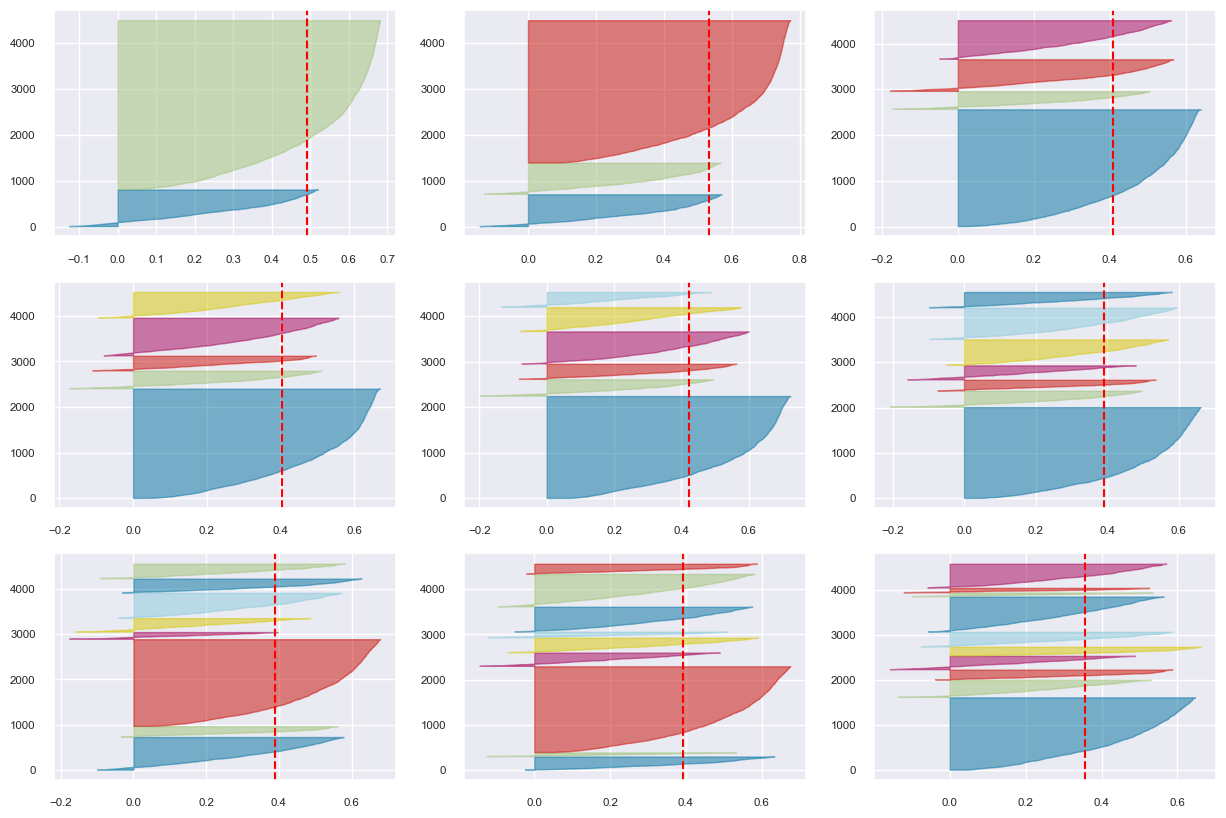

In [41]:
#  Create a 3x3 grid of subplots to visualize the Silhouette scores
fig, ax = plt.subplots(3,3, figsize =(15,10)) 
for i in np.arange(2, 11): 
    kmeans= KMeans(n_clusters=i, init="k-means++", n_init= 10, max_iter= 100, random_state=42) 
    q, mod = divmod(i-2,3) 
    visualizer = SilhouetteVisualizer(kmeans, colors ='yellowbrick', ax=ax[q][mod])
    visualizer.fit(X_tr) 


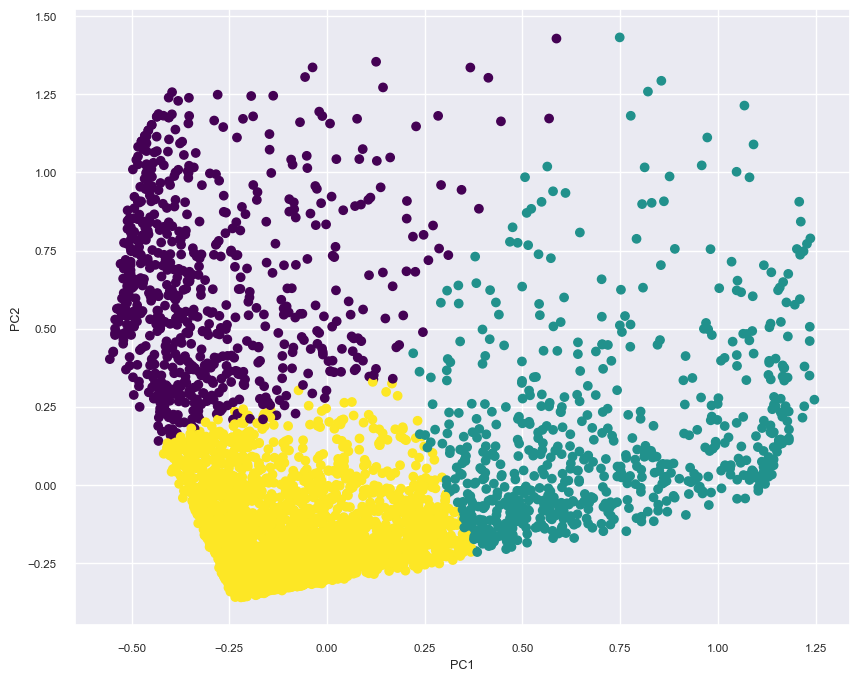

In [42]:
# Visualize cluster labels

plt.figure(figsize=(10, 8))
plt.scatter(X_tr[:, 0], X_tr[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

From the picture above we can see how the data is grouped into different clusters and whether there is a clear pattern or structure in the data. if you look at the pattern and structure of the data it is clear that we can use it as a reference in building predictive models or conducting further analysis of the data.

# EDA CLuster

In [43]:
df1

,CASH_ADVANCE,BALANCE,PURCHASES,CREDIT_LIMIT,PURCHASES_TRX
0,0.000000,16.581535,200.00,1200.0,2
1,0.000000,943.584041,103.00,1000.0,1
2,0.000000,1.979916,80.00,1500.0,1
3,0.000000,461.455720,585.00,1000.0,1
4,0.000000,1053.594730,1450.00,1500.0,1
...,...,...,...,...,...
4470,1259.571764,1079.008102,0.00,1200.0,0
4471,3819.672466,809.582978,0.00,4150.0,0
4472,2008.153534,3386.490883,560.98,10100.0,20
4473,4359.325750,4840.545574,1595.93,6000.0,25


In [44]:
# DataFrame subset dari df
df_eda = df1.loc[clus_sample].copy()
df_eda

,CASH_ADVANCE,BALANCE,PURCHASES,CREDIT_LIMIT,PURCHASES_TRX
0,0.000000,16.581535,200.00,1200.0,2
1,0.000000,943.584041,103.00,1000.0,1
2,0.000000,1.979916,80.00,1500.0,1
3,0.000000,461.455720,585.00,1000.0,1
4,0.000000,1053.594730,1450.00,1500.0,1
...,...,...,...,...,...
4470,1259.571764,1079.008102,0.00,1200.0,0
4471,3819.672466,809.582978,0.00,4150.0,0
4472,2008.153534,3386.490883,560.98,10100.0,20
4473,4359.325750,4840.545574,1595.93,6000.0,25


The DataFrame is copied by /copy() so that it can be modified without affecting the original DataFrame. This subset is used to perform exploratory data analysis (EDA)

In [45]:
#add a cluster column to df
df_eda['cluster'] = cluster_labels
df_eda

,CASH_ADVANCE,BALANCE,PURCHASES,CREDIT_LIMIT,PURCHASES_TRX,cluster
0,0.000000,16.581535,200.00,1200.0,2,2
1,0.000000,943.584041,103.00,1000.0,1,2
2,0.000000,1.979916,80.00,1500.0,1,2
3,0.000000,461.455720,585.00,1000.0,1,2
4,0.000000,1053.594730,1450.00,1500.0,1,2
...,...,...,...,...,...,...
4470,1259.571764,1079.008102,0.00,1200.0,0,2
4471,3819.672466,809.582978,0.00,4150.0,0,0
4472,2008.153534,3386.490883,560.98,10100.0,20,0
4473,4359.325750,4840.545574,1595.93,6000.0,25,0


Adding a cluster column to the df_eda DataFrame which contains the cluster label that has been assigned the K-Means algorithm to each row of data. Then, the df_eda DataFrame is used as output so that it will display the df_eda data that has been added to the cluster column.

In [46]:
df_eda.groupby('cluster').mean().reset_index()

,cluster,CASH_ADVANCE,BALANCE,PURCHASES,CREDIT_LIMIT,PURCHASES_TRX
0,0,4466.925876,4264.010705,453.151137,7323.812950,5.693525
1,1,400.450335,2166.749971,4064.958818,7469.719350,54.101920
2,2,316.054147,830.531449,458.483669,3210.572619,7.821083


From the data given, there are three clusters with an average value of their features. Each cluster has an identity number (0, 1, and 2) and has average values for the following features:

* CASH_ADVANCE: the amount of cash withdrawn from the credit card (in dollars).
* BALANCE: remaining balance on the credit card (in dollars).
* PURCHASES: the number of purchases made with a credit card (in dollars).
* CREDIT_LIMIT: credit limit given to the credit card (in dollars).
* PURCHASES_TRX: number of purchase transactions made by credit card.


--From the average value of these features, it can be concluded that:

* Cluster 0 has a high average CASH_ADVANCE value, a high average BALANCE value, and a low PURCHASES average value, a high credit limit and a very low frequency of making purchase transactions. This may indicate that people in this cluster tend to make cash withdrawals from their credit cards more often, have large balances on their credit cards, but make few purchases with their credit cards.
* Cluster 1 has a relatively low average CASH_ADVANCE value, a relatively high average BALANCE value, and the highest PURCHASES average value, a high credit limit and a very high frequency of making purchase transactions. This may indicate that people in this cluster tend to make cash withdrawals from their credit cards less often, have sufficient balances on their credit cards, but make frequent purchases with their credit cards.
* Cluster 2 has a low CASH_ADVANCE average value, a low average BALANCE value, and a relatively high PURCHASES average value, the lowest credit limit and the frequency of making purchase transactions is quite high. This may indicate that people in this cluster tend to withdraw cash from their credit cards infrequently, have the lowest balances on their credit cards, but make frequent purchases with their credit cards.

Credit user category
0 = above average
1 = medium
2 = below average

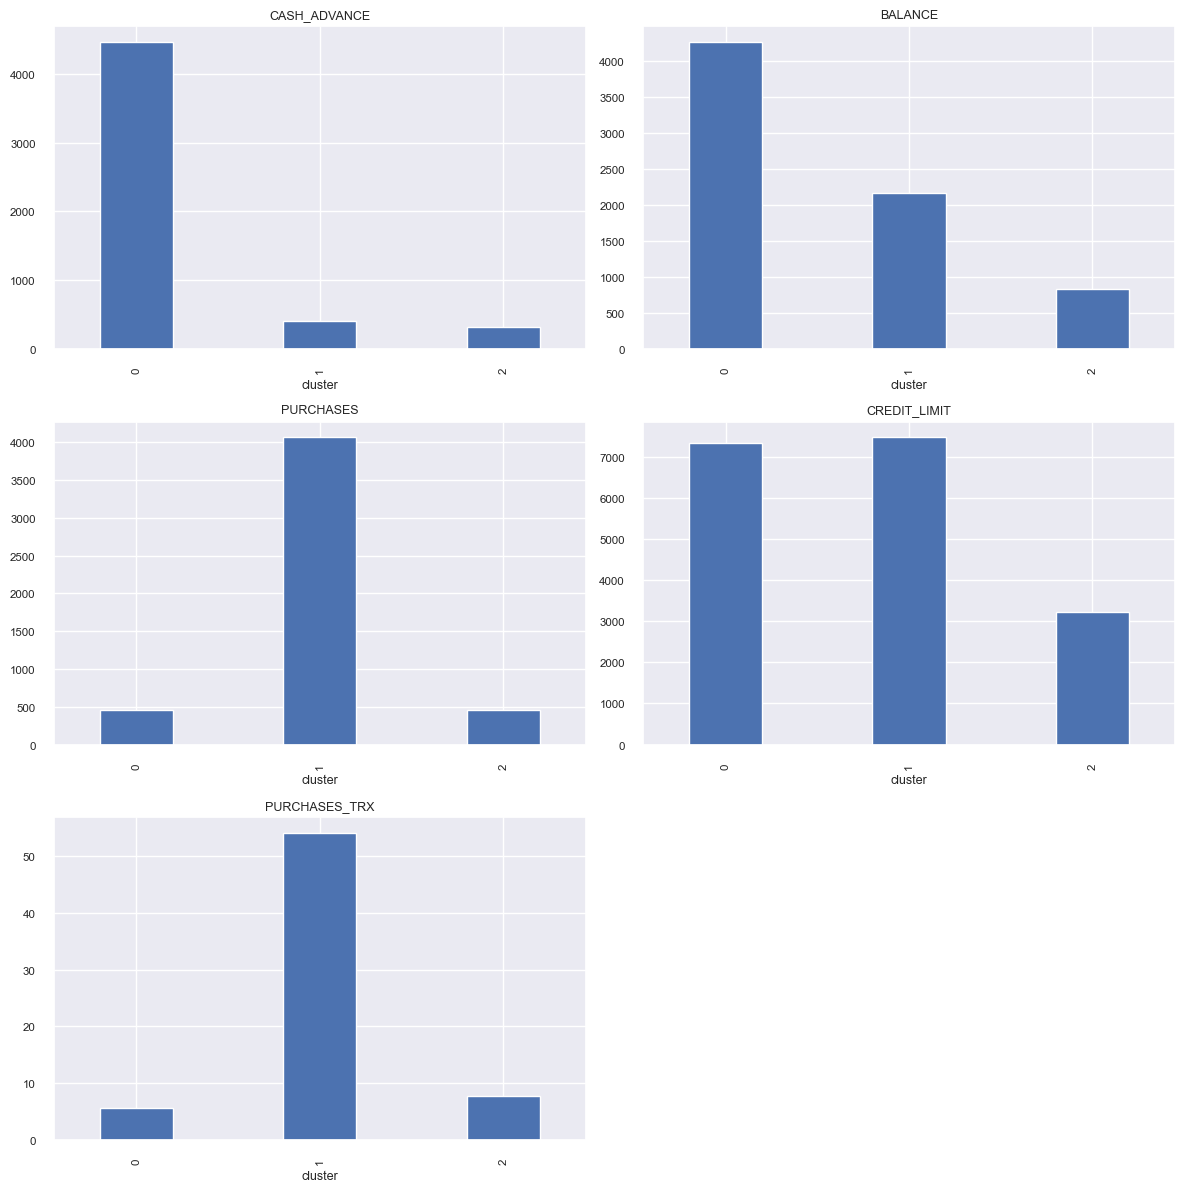

In [47]:
# Calculate mean of each numeric column for each cluster
fig, axs = plt.subplots((len(num) + 1) // 2, 2, figsize=(12, 12))
for i, col in enumerate(num):
    df_eda.groupby('cluster')[col].mean().plot(kind='bar', width=0.4, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(col)
plt.tight_layout()
fig.delaxes(axs[2][1])
plt.show()


From the picture above it can be concluded that:

* CASH_ADVANCE: the amount of cash withdrawn from a credit card (in dollars), cluster 0 makes cash withdrawals using a credit card more often, followed by clusters 1 and 2, clusters 1 and 2 have relatively the same frequency or not much different in terms of withdrawing cash using a credit card

* BALANCE: remaining balance on credit cards (in dollars), cluster 0 has the highest remaining credit balance, followed by cluster 1 and finally cluster 2

* PURCHASES: the number of purchases made with a credit card (in dollars). cluster 1 is very filter shopping or making purchases using credit followed by clusters 2 and 0, clusters 2 and 0 are relatively the same not much different in terms of the number of purchases using credit.

* CREDIT_LIMIT: credit limit given to the credit card (in dollars). cluster 1 has the largest credit limit and is relatively the same as cluster 2, the difference is not so significant in the credit limit, while cluster 2 has fewer limits compared to cluster 0 and 1 limits

* PURCHASES_TRX: number of purchase transactions made by credit card. cluster 1 has a very high shopping frequency using a credit card, followed by clusters 2 and 0, clusters 2 and 0 have relatively the same frequency or not much different in terms of the number of purchases using credit


In [48]:
# Simpan full pipeline ke dalam file model_full_pipeline.pkl
with open('model_full_pipeline.pkl', 'wb') as file1:
    pickle.dump(pipe, file1)

# Simpan model logreg ke dalam file model_logreg.pkl
with open('model_kmeans.pkl', 'wb') as file2:
    pickle.dump(kmeans, file2)

# Model & Overall Analysis 

The K-Means model is a clustering technique used to group data into homogeneous groups based on the similarity between data points. in this case K-Means analysis can be used to group consumers into groups based on their buying behavior. Thus, K-Means analysis can help understand market behavior and develop more effective marketing strategies.

Credit card user categories:
* Cluster 0 = above average
* Cluster 1 = medium
* Cluster 2 = below average

* The average balance maintained by customers and identifying customer groups that maintain high balances is cluster 0, followed by cluster 1 and the last is cluster 2
* Identified customers who often make purchases using their credit cards and the amount spent on these purchases is cluster 1 then followed by cluster 2 and the last is cluster 0
* To analyze the credit limit given to customers and identify customers who exceed their credit limit, from the existing clusters there are no clusters that use credit by exceeding the credit limit, credit that has a large limit is in cluster 2 then cluster 0 and the last is cluster 1

* Cluster 0 has a high average credit limit value, and the frequency of making purchase transactions is very low.
* Cluster 1 has a high average credit limit value, and the frequency of making purchase transactions is very high.
* Cluster 2 has the lowest average credit limit value, and the frequency of making purchase transactions is quite high.


the strengths and weaknesses of the model

Advantages:
1. Efficient for data with several features and several clusters that are not too large.
2. Very effective in separating data that is separated (well-separated).
Easy to implement and understand by many people.
3. The clustering results generated by K-Means are easy to interpret.

Weaknesses:

1.	Depending on the initial value (initial seed) used, it is possible to produce a different solution each time it is run.
2.	K-Means is not effective for data with complex cluster shapes or data that contains noise.
3.	It cannot handle data with an unknown number of clusters or different sizes.
4.	K-Means does not produce cluster values hierarchically, preventing their use for data analysis using the hierarchical method.



# Conceptual Problems

1. The inertia of the K-Means algorithm is:

* A measure of the distance between each data point and the center of the group (centroid) assigned to that data point. Inertia on K-Means is calculated by adding up the squared distance of each data point to the center of the nearest assigned group. The purpose of the K-Means algorithm is to find the center of the group that has the smallest sum of squared distances, which means that the group is the most homogeneous and separate from other groups. Thus, decreasing the value of inertia shows an increase in the quality of clustering in the K-Means algorithm.


2. What is meant by the Elbow Method (reasons for use, how to use, weaknesses/strengths)

* The Elbow Method is a visual technique for selecting the optimal number of clusters in the K-Means algorithm. The purpose of the Elbow Method is to find the optimal number of clusters by looking at the change in the value of inertia in each iteration when the number of clusters is increased.

* The reason for using the Elbow Method is to help determine the right number of clusters in the K-Means algorithm. In practice, we often don't know the right number of clusters to use for a particular dataset, so using the Elbow Method can help us choose the optimal number of clusters.

* The way to use the Elbow Method is to plot the value of inertia in each iteration for different numbers of different clusters. Then, we look for points on the plot where the inertia decreases significantly and forms an elbow, which is referred to as an "elbow". The number of clusters at this elbow point is then considered the optimal number of clusters for the given dataset.

* The advantages of the Elbow Method are that this method is easy to implement and can provide quite good results in determining the optimal number of clusters. In addition, this method also provides an easy-to-understand visual interpretation.

* However, the drawback of the Elbow Method is that it does not always work well on all datasets, especially if the dataset is very complex or does not have a clear structure.


In [51]:
excel_file_path = 'output.xlsx'
df_eda.to_excel(excel_file_path, index=False)